In [12]:
import pandas as pd
import numpy as np
import os
from tqdm import tqdm
from astropy.timeseries import LombScargle
import astropy.units as u
import matplotlib.pyplot as plt

In [16]:
directories = ["ECL","RR","CEP"]
for star_type in directories:
    type_path = os.path.join("..","dataset",star_type)
    for lc_id in tqdm(os.listdir(type_path)[:20]):
        lc = pd.read_csv(os.path.join(type_path,lc_id))
        mask = lc["rejected_by_variability"] == False
        mask2 = lc["band"] == "G"
        mask3 = mask & mask2
        mag,mjd = lc.loc[mask3][["mag","time"]].values.T
        model = BoxLeastSquares(mjd*u.day,mag)
        periodogram = model.autopower(0.2)

  5%|▌         | 1/20 [00:20<06:35, 20.80s/it]

In [20]:
type_path = os.path.join("..","dataset","RR")
lc = pd.read_csv(os.path.join(type_path,"245293416297967360.csv"))
mask = lc["rejected_by_variability"] == False
mask2 = lc["band"] == "G"
mask3 = mask & mask2
mag,mjd = lc.loc[mask3][["mag","time"]].values.T
frequency, power = LombScargle(mjd,mag).autopower()

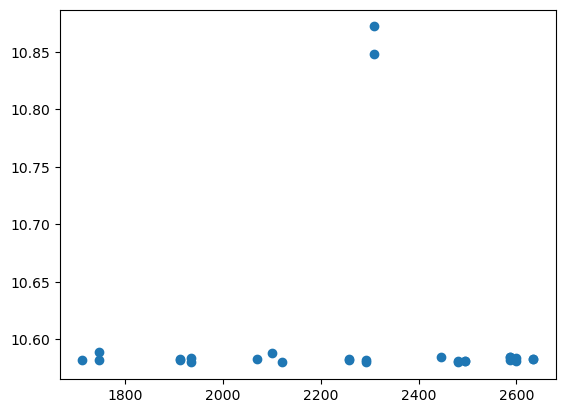

In [21]:
plt.scatter(mjd,mag)